In [202]:
import pandas as pd 
import seaborn as sns 
import bar_chart_race as bcr
import matplotlib.pyplot as plt

# Något med parfym

Parfumo Fragrance Dataset from 
https://www.kaggle.com/datasets/olgagmiufana1/parfumo-fragrance-dataset?resource=download&select=parfumo_datos.csv


In [205]:
perfume_data = pd.read_csv('Parfumo.csv')
perfume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59325 entries, 0 to 59324
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           59324 non-null  object
 1   Brand          59324 non-null  object
 2   Release Year   39019 non-null  object
 3   Concentration  12483 non-null  object
 4   Rating Value   30056 non-null  object
 5   Rating Count   30056 non-null  object
 6   Main Accords   32225 non-null  object
 7   Top Notes      31139 non-null  object
 8   Middle Notes   31149 non-null  object
 9   Base Notes     31154 non-null  object
 10  Perfumers      20544 non-null  object
 11  URL            59325 non-null  object
dtypes: object(12)
memory usage: 5.4+ MB


We have a lot of missing data in all columns but Name, Brand and URL. 

In [207]:
perfume_data.head()

,Name,Brand,Release Year,Concentration,Rating Value,Rating Count,Main Accords,Top Notes,Middle Notes,Base Notes,Perfumers,URL
0,# 455 Tabac Écarlate Le Ré Noir,Le Ré Noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Valery Sokolov / Валерий Соколов,https://www.parfumo.com/Perfumes/Le_Re_Noir/45...
1,#0071 Tidal Pool CB I Hate Perfume 2004,CB I Hate Perfume,2004,NaN,NaN,NaN,NaN,Bergamot,French lavender,"Musk, Foulness",Harry Frémont,https://www.parfumo.com/Perfumes/CB_I_Hate_Per...
2,#0154 Pumpkin Pie CB I Hate Perfume 1998,CB I Hate Perfume,1998,NaN,NaN,NaN,"Green, Leathery, Chypre, Animal",NaN,NaN,NaN,NaN,https://www.parfumo.com/Perfumes/CB_I_Hate_Per...
3,#0162 Wet Stone CB I Hate Perfume 2006,CB I Hate Perfume,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.parfumo.com/Perfumes/CB_I_Hate_Per...
4,#0171 Chocolate Box CB I Hate Perfume,CB I Hate Perfume,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.parfumo.com/Perfumes/CB_I_Hate_Per...


We see that the Name column data has a number, year and brand. Let's clean.

In [209]:
# Cleaning the Name column

clean_perfume_data = perfume_data.copy()
clean_perfume_data['Number'] = clean_perfume_data['Name'].str.extract(r'\#\s?(\d+)') # Parenthesis captures what should be carried over to the column Number
#Might need the number for later, might not.
clean_perfume_data['Name'] = clean_perfume_data['Name'].str.replace(r'\#\s?\d+\s?\-?\s?', '', regex = True) # Remove number from 'Name'

# Got some help with how to remove part of a string if it is present in another column! 
# https://stackoverflow.com/questions/68266337/how-to-remove-substring-of-a-column-if-it-matches-with-string-of-another-column 

clean_perfume_data['Name'] = clean_perfume_data.apply(
    lambda x: str(x['Name']).replace(str(x['Brand']), '') if pd.notna(x['Name']) and pd.notna(x['Brand']) else x['Name'],
    axis=1)

clean_perfume_data['Release Year'] = clean_perfume_data['Name'].str.extract(r'(\d{4})$') # Fills in column Release Year with years from Name
clean_perfume_data['Name'] = clean_perfume_data['Name'].str.replace(r'\d{4}$', '', regex = True) # Begin from the end and remove four digits (year) if found



# Removing rows if Release Year, Main Accords, Top Notes, Middle Notes or Base Notes are empty since these are difficult to fill, 
# it would be a complete guessing game. Also, they're all relevant parameters which makes is unwise to fill them. 

accords_notes = clean_perfume_data.copy().dropna(subset = ['Release Year','Main Accords', 'Top Notes', 'Middle Notes', 'Base Notes'])\
                [['Name', 'Rating Value', 'Release Year', 'Main Accords', 'Top Notes', 'Middle Notes', 'Base Notes']]

Now let's find the coconut scents. 

In [211]:
def coconut_finder (row):
    if row.str.contains('coconut', case = False).any():
        return 1
    else:
        return 0

accords_notes['Coconut'] = accords_notes[['Main Accords', 'Top Notes', 'Middle Notes', 'Base Notes']].apply(coconut_finder, axis = 1)

Now we should visualise how many coconut scents are released per year

<Axes: xlabel='Release Year', ylabel='Coconut'>

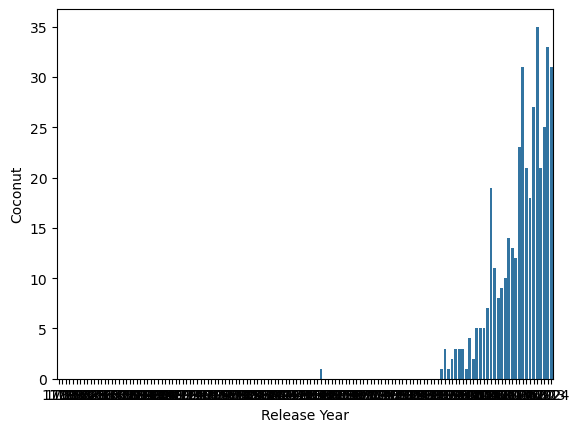

In [213]:
coconut_per_year = accords_notes.groupby('Release Year').sum()
sns.barplot(coconut_per_year, x = 'Release Year', y = 'Coconut')

A lot of years with no coco release, if zero, let's not display that year. 

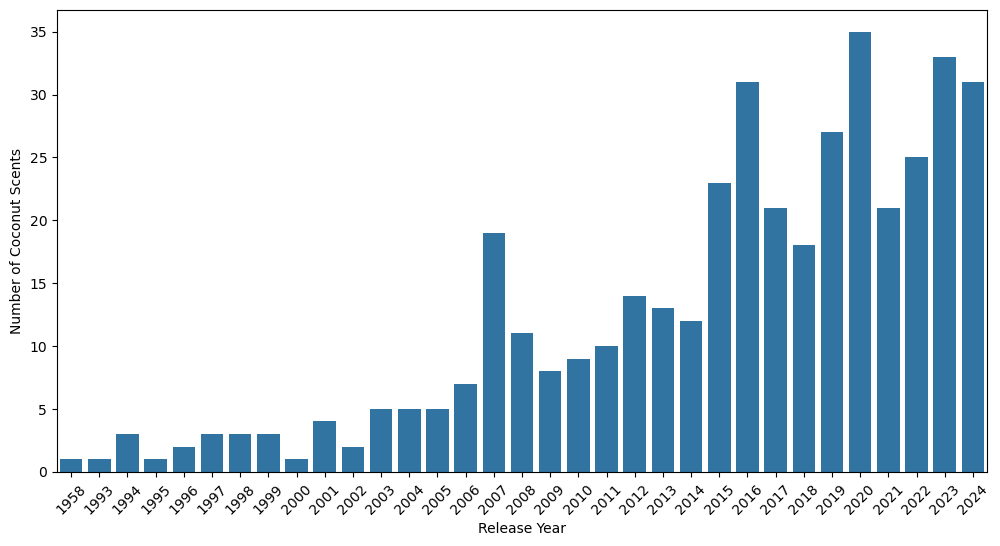

In [215]:
coconut_per_year = coconut_per_year.drop(coconut_per_year[coconut_per_year['Coconut'] == 0].index) # No years with 0

plt.figure(figsize=(12, 6))
sns.barplot(coconut_per_year, x = 'Release Year', y = 'Coconut')
plt.ylabel('Number of Coconut Scents')
plt.xticks(rotation=45)
plt.show()

Name of perfume with coconut with highest rating per year.

In [217]:
coconut_perfumes = accords_notes[accords_notes['Coconut'] == 1] # Only scents with coconut

highest_rated_coconut = coconut_perfumes.loc[
    coconut_perfumes.groupby("Release Year")["Rating Value"].idxmax() # Only indexes with highest rating value
]

highest_rated_coconut[['Release Year', 'Name', 'Rating Value']]

import dataframe_image as dfi

# Save DataFrame as an image
# dfi.export(highest_rated_coconut[['Release Year', 'Name', 'Rating Value']], "highest_rated_coconut.png")


Let us see the Main Accords, Top Notes, Middle Notes and Base Notes trends! Animate top ten per year, accumulative 

In [219]:
# Create a subset-df for each descriptor.
# Every perfume's accords and notes are exploded so each comma separated descriptor has one row
accords_df = accords_notes[['Release Year', 'Main Accords']].copy()
accords_df['Main Accords'] = accords_df['Main Accords'].str.split(',')
accords_df = accords_df.explode('Main Accords')
accords_df['Main Accords'] = accords_df['Main Accords'].str.strip() # Because 'A' ' A' should be the same column

top_df = accords_notes[['Release Year', 'Top Notes']].copy()
top_df['Top Notes'] = top_df['Top Notes'].str.split(',')
top_df = top_df.explode('Top Notes')
top_df['Top Notes'] = top_df['Top Notes'].str.strip()

middle_df = accords_notes[['Release Year', 'Middle Notes']].copy()
middle_df['Middle Notes'] = middle_df['Middle Notes'].str.split(',')
middle_df = middle_df.explode('Middle Notes')
middle_df['Middle Notes'] = middle_df['Middle Notes'].str.strip()


base_df = accords_notes[['Release Year', 'Base Notes']].copy()
base_df['Base Notes'] = base_df['Base Notes'].str.split(',')
base_df = base_df.explode('Base Notes')
base_df['Base Notes'] = base_df['Base Notes'].str.strip()

# Count the cumulation of descriptors per year 
accords_counts = accords_df.groupby(['Release Year', 'Main Accords']).size().unstack(fill_value=0).cumsum() # 140 rows × 21 columns
top_counts = top_df.groupby(['Release Year', 'Top Notes']).size().unstack(fill_value=0).cumsum() # 140 rows x 1917 columns
middle_counts = middle_df.groupby(['Release Year', 'Middle Notes']).size().unstack(fill_value=0).cumsum() # 140 rows × 2127 columns
base_counts = base_df.groupby(['Release Year', 'Base Notes']).size().unstack(fill_value=0).cumsum() # 140 rows × 2000 columns

# Reduce columns in top, middle and base

# Indexes of columns where last row is greater or equal to 100
top_reduce = top_counts.loc['2024'][top_counts.loc['2024'] >= 100].index 
middle_reduce = middle_counts.loc['2024'][middle_counts.loc['2024'] >= 100].index 
base_reduce = base_counts.loc['2024'][base_counts.loc['2024'] >= 100].index

# Reduced versions of top, middle and base
top_counts = top_counts.copy()[top_reduce] # 140 rows × 79 columns
middle_counts = middle_counts.copy()[middle_reduce] # 140 rows × 84 columns
base_counts = base_counts.copy()[base_reduce] # 140 rows × 49 columns

In [220]:
"""

lista1 = [accords_counts, top_counts, middle_counts, base_counts]
lista2 = ['Main Accords', 'Top Notes', 'Middle Notes', 'Base Notes']

for i in range(len(lista1)):
    bcr.bar_chart_race(
    df=lista1[i],
    filename=f'{lista2[i]}.gif',  # Saves the animation as a video
    orientation='h',  # Horizontal bars
    sort='desc',  # Sort descending
    n_bars=10,  # Number of top bars to display
    title=f'Frequency of {lista2[i]} Over Time',
    figsize=(6, 4))  # Adjust size as needed)
    
"""


"\n\nlista1 = [accords_counts, top_counts, middle_counts, base_counts]\nlista2 = ['Main Accords', 'Top Notes', 'Middle Notes', 'Base Notes']\n\nfor i in range(len(lista1)):\n    bcr.bar_chart_race(\n    df=lista1[i],\n    filename=f'{lista2[i]}.gif',  # Saves the animation as a video\n    orientation='h',  # Horizontal bars\n    sort='desc',  # Sort descending\n    n_bars=10,  # Number of top bars to display\n    title=f'Frequency of {lista2[i]} Over Time',\n    figsize=(6, 4))  # Adjust size as needed)\n    \n"

Now let's see which perfumer has the best rating value. 

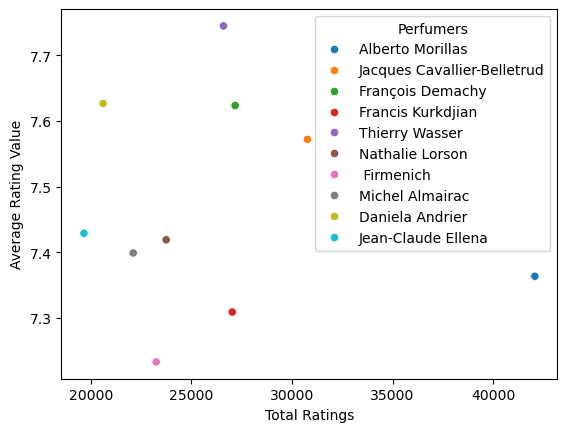

In [222]:
# New columns are relevant, new cleaning
# Cannot fill relevant columns with anything, do not want to distort data
perfumer_rating = perfume_data[['Rating Value', 'Rating Count', 'Perfumers']].copy().dropna(subset = ['Rating Value', 'Rating Count', 'Perfumers'])
# Remove rows without integers
perfumer_rating = perfumer_rating[perfumer_rating['Rating Count'] != 'Rating Count']
# Remove the word rating and change types to integer and float
perfumer_rating['Rating Count'] = perfumer_rating['Rating Count'].str.replace(r'Ratings', '').astype(int)
perfumer_rating['Rating Value'] = perfumer_rating['Rating Value'].astype(float)

# One perfumer per row! 
perfumer_rating['Perfumers'] =  perfumer_rating['Perfumers'].str.split(',')

agg_perfumer_rating = perfumer_rating.explode('Perfumers').groupby('Perfumers').agg(
    average_rating_value = ('Rating Value', 'mean'),
    total_ratings = ('Rating Count', 'sum')
    )

most_rated = agg_perfumer_rating.sort_values('total_ratings', ascending = False).head(10)

sns.scatterplot(x = 'total_ratings', y = 'average_rating_value', hue = 'Perfumers', data = most_rated)
plt.xlabel('Total Ratings')
plt.ylabel('Average Rating Value')
plt.show()